In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
def calc_mse(y, y_pred):
    """средняя квадратическая ошибка"""
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      bias=0, # intersept=0   
                                      coef=True, 
                                      random_state=42)

In [4]:
coef

array([40.71064891,  6.60098441])

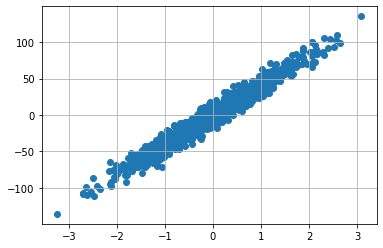

In [5]:
plt.scatter(X_[:, 0], y_);
plt.grid()

In [6]:
def eval_GD(X, y, iterations, eta=1e-4):
    """метод градиентного спуска"""
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
        errors.append(err)
    return w, errors

In [7]:
def eval_SGD(X, y, iterations, eta=1e-4):
    """стохастический градиентный спуск"""
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    errors = []
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
        errors.append(err)
    return w, errors

In [8]:
%%time

w_gd, err_gd = eval_GD(X_, y_, iterations=1000, eta=1e-3)

100: weights=[7.32874893 1.16801485], MSE=1103.189
200: weights=[13.00512448  2.22541594], MSE=767.897
300: weights=[17.72134432  3.08125022], MSE=536.838
400: weights=[21.63983474  3.77385273], MSE=377.594
500: weights=[24.89554186  4.33428243], MSE=267.836
600: weights=[27.60058142  4.78770076], MSE=192.180
700: weights=[29.84810175  5.15448943], MSE=140.027
800: weights=[31.71549299  5.45115674], MSE=104.072
900: weights=[33.26705326  5.69107223], MSE=79.283
1000: weights=[34.55620366  5.88506234], MSE=62.191
CPU times: user 49.9 ms, sys: 0 ns, total: 49.9 ms
Wall time: 47.4 ms


In [9]:
%%time

w_sgd, err_sgd = eval_SGD(X_, y_, iterations=1000, eta=1e-3)

100: weights=[5.65425267 1.36197629], MSE=1205.412
200: weights=[12.7105185   3.55875223], MSE=777.747
300: weights=[17.03707268  4.31522315], MSE=557.260
400: weights=[22.08826107  5.2663299 ], MSE=354.413
500: weights=[25.87193649  5.6555326 ], MSE=234.136
600: weights=[28.44101069  5.83399449], MSE=168.474
700: weights=[30.47041536  5.98949961], MSE=126.357
800: weights=[32.21255052  6.06519403], MSE=94.853
900: weights=[33.73922351  6.1450052 ], MSE=72.050
1000: weights=[34.6055792   6.40988743], MSE=60.892
CPU times: user 86.8 ms, sys: 158 µs, total: 87 ms
Wall time: 82.9 ms


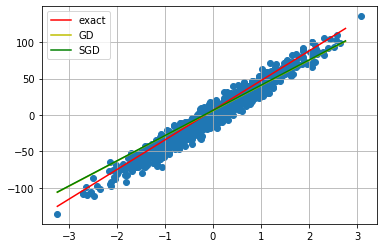

In [10]:
x = np.arange(np.min(X_[:, 0]), np.max(X_[:, 0]))
y0 = coef[1] + x*coef[0]
y1 = w_gd[1] + x*w_gd[0]
y2 = w_sgd[1] + x*w_sgd[0]

plt.scatter(X_[:, 0], y_)
plt.plot(x, y0, c='r', label="exact")
plt.plot(x, y1, c='y', label="GD")
plt.plot(x, y2, c='g', label="SGD")
plt.grid()
plt.legend()

Text(0, 0.5, 'Ошибка (MSE)')

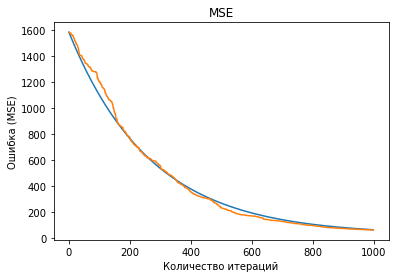

In [11]:
plt.plot(range(len(err_gd)), err_gd)
plt.plot(range(len(err_sgd)), err_sgd)
plt.title("MSE")
plt.xlabel("Количество итераций")
plt.ylabel("Ошибка (MSE)")

2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).

In [12]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]]).T  # возраст репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [13]:
# веса по МНК
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([ 5.31431473e+01,  5.13381190e+00,  6.37461212e-03, -5.44708363e-01])

In [14]:
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [20]:
def standardization(x: np.ndarray) -> np.ndarray:
    return (x - x.mean()) / x.std()

In [26]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standardization(X[:, 1])
X_st[:, 2] = standardization(X[:, 2])
X_st[:, 3] = standardization(X[:, 3])
X, X_st

(array([[   1,    1,  500,   21],
        [   1,    1,  700,   25],
        [   1,    2,  750,   27],
        [   1,    1,  600,   20],
        [   1,    3, 1450,   25],
        [   1,    0,  800,   18],
        [   1,    5, 1500,   35],
        [   1,   10, 2000,   60],
        [   1,    1,  450,   20],
        [   1,    2, 1000,   30]]),
 array([[ 1.        , -0.57142857, -0.97958969, -0.60595294],
        [ 1.        , -0.57142857, -0.56713087, -0.264571  ],
        [ 1.        , -0.21428571, -0.46401617, -0.09388003],
        [ 1.        , -0.57142857, -0.77336028, -0.69129842],
        [ 1.        ,  0.14285714,  0.97958969, -0.264571  ],
        [ 1.        , -0.92857143, -0.36090146, -0.86198939],
        [ 1.        ,  0.85714286,  1.08270439,  0.58888384],
        [ 1.        ,  2.64285714,  2.11385144,  2.72252095],
        [ 1.        , -0.57142857, -1.08270439, -0.69129842],
        [ 1.        , -0.21428571,  0.05155735,  0.16215642]]))

In [28]:
w = eval_model_reg2(X_st, y, iterations=1000, eta=1e-3, lambda_=0.001, verbose=True)

100: weights=[10.81977943  1.25010672  2.00850173  2.77577844], MSE=2251.724
200: weights=[19.26820475  2.05082063  2.80475207  3.45211794], MSE=1515.225
300: weights=[26.18241951  2.5179572   3.27948647  3.80175618], MSE=1027.942
400: weights=[31.84103209  2.79581186  3.57077076  3.96649432], MSE=703.417
500: weights=[36.47205635  2.96632879  3.75704628  4.02684901], MSE=486.574
600: weights=[40.26209948  3.07604028  3.88289004  4.02853122], MSE=341.437
700: weights=[43.36388132  3.15136682  3.97364509  3.99748473], MSE=244.203
800: weights=[45.90238819  3.20730676  4.0437298   3.94842715], MSE=179.020
900: weights=[47.97990927  3.2523715   4.10135713  3.88970082], MSE=135.300
1000: weights=[49.68015829  3.29138843  4.15121494  3.82602776], MSE=105.960


In [29]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X_st, y, iterations=1000, eta=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X_st, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

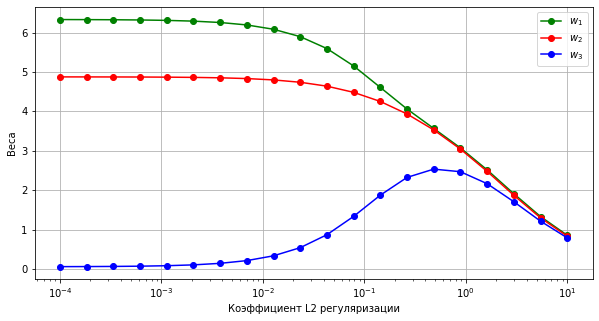

In [30]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend()

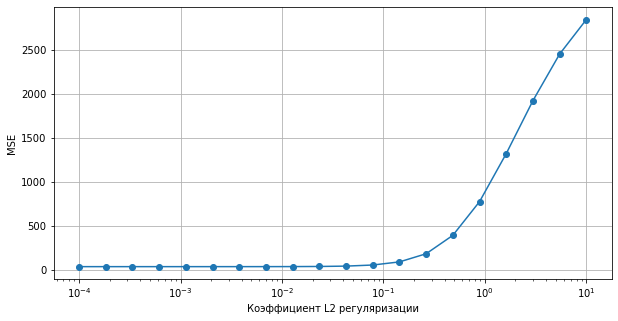

In [31]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errors, 'o-')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('MSE')
plt.grid()